In [1]:
from ase.io.espresso import read_espresso_out, read_espresso_in
import os

path2relax = "/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/relax/export/relax_152649ce-f870-41a7-85b8-2777a1ed080b"
with open(os.path.join(path2relax, "relax.out")) as f:
    atom_gen = read_espresso_out(f, index=slice(None))
    # 全atoms取得
    all_ase_atoms = []
    while True:
        try:
            ase_atoms = next(atom_gen)
            all_ase_atoms.append(ase_atoms)
        except StopIteration:
            break

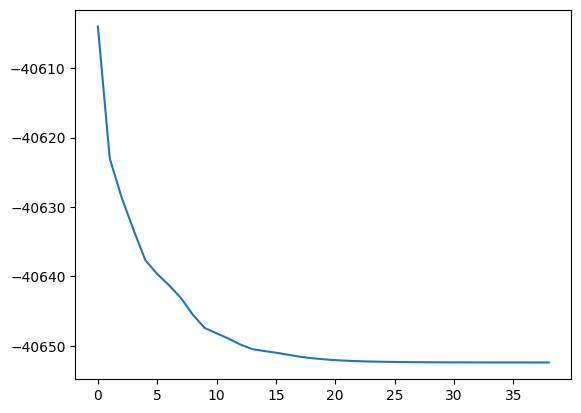

In [2]:
import matplotlib.pyplot as plt

energies = [atoms.get_potential_energy() for atoms in all_ase_atoms]
plt.plot(energies)

# 複数のRELAX計算の軌跡をまとめる

In [19]:
from glob import glob
import pickle
from pydantic import BaseModel

path2relax = "/Users/y1u0d2/Google Drive/マイドライブ/HamaLab_kotani/QE/Si/diamond__mp-149/relax/export"
relax_dir_list = glob(os.path.join(path2relax, "relax_*"))

In [20]:
class EnergyVolumeDependencePlotConfig(BaseModel):
    energy_per_atom: float
    volume_per_atom: float
    structure_id: str

energy_volume_dependence_plot_config_list = []
for relax_dir in relax_dir_list:
    atoms_dir_list = glob(os.path.join(relax_dir, "atoms", "atoms_*"))
    print("Number of Atoms: ", len(atoms_dir_list))
    for atoms_dir in atoms_dir_list:
        atoms = pickle.load(open(os.path.join(atoms_dir, "atoms.pkl"), "rb"))
        energy_volume_dependence_plot_config_list.append(
            EnergyVolumeDependencePlotConfig(
                energy_per_atom=atoms.get_atomic_energy(),
                volume_per_atom=atoms.get_atomic_volume(),
                structure_id="Diamond"
            )
        )

Number of Atoms:  49
Number of Atoms:  31
Number of Atoms:  14
Number of Atoms:  50
Number of Atoms:  50
Number of Atoms:  26
Number of Atoms:  19
Number of Atoms:  50
Number of Atoms:  50
Number of Atoms:  16
Number of Atoms:  31
Number of Atoms:  34
Number of Atoms:  36
Number of Atoms:  31
Number of Atoms:  41
Number of Atoms:  31
Number of Atoms:  50
Number of Atoms:  22
Number of Atoms:  50
Number of Atoms:  13
Number of Atoms:  50
Number of Atoms:  50
Number of Atoms:  29
Number of Atoms:  44
Number of Atoms:  48
Number of Atoms:  39
Number of Atoms:  19
Number of Atoms:  45
Number of Atoms:  41
Number of Atoms:  37
Number of Atoms:  50
Number of Atoms:  14
Number of Atoms:  35
Number of Atoms:  33
Number of Atoms:  22
Number of Atoms:  19
Number of Atoms:  31
Number of Atoms:  50
Number of Atoms:  29
Number of Atoms:  38
Number of Atoms:  50
Number of Atoms:  28
Number of Atoms:  27
Number of Atoms:  33
Number of Atoms:  50
Number of Atoms:  50
Number of Atoms:  31
Number of Ato

In [27]:
import pandas as pd
import seaborn as sns

energy_volume_dependence_plot_df = pd.DataFrame([config.model_dump() for config in energy_volume_dependence_plot_config_list])

<Axes: xlabel='volume_per_atom', ylabel='energy_per_atom'>

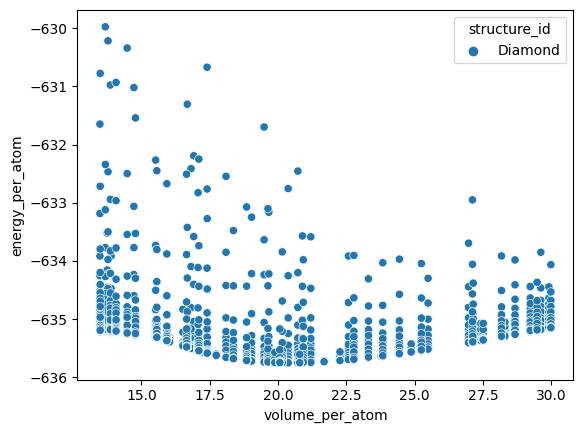

In [26]:
fig, ax = plt.subplots()
sns.scatterplot(x="volume_per_atom", y="energy_per_atom", data=energy_volume_dependence_plot_df, ax=ax, hue="structure_id")

<Axes: xlabel='volume_per_atom', ylabel='energy_per_atom'>

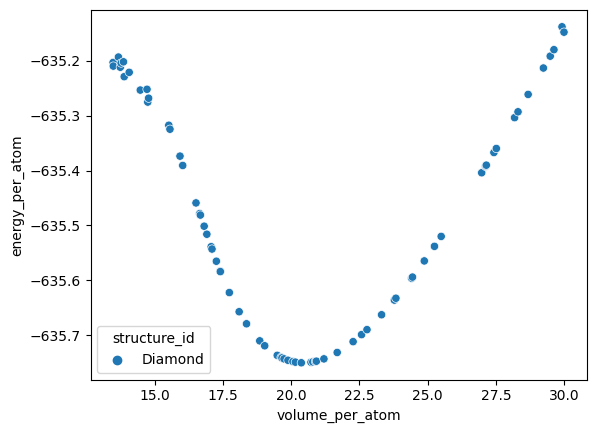

In [32]:
energy_volume_dependence_grouped_df = energy_volume_dependence_plot_df.groupby("volume_per_atom").min().reset_index()
fig, ax = plt.subplots()
sns.scatterplot(x="volume_per_atom", y="energy_per_atom", data=energy_volume_dependence_grouped_df, ax=ax, hue="structure_id")